#Homework 10:
#Boyeong Hong (bh1555)

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import json
import urllib2
import zipfile
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import geopandas as gpd
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


###Take zipcode list of NYC

In [2]:
#open geojson file
with open('nyc-zip-code-tabulation-areas-polygons.geojson') as f:
    zipcode = json.load(f)

In [3]:
#zipcode

In [4]:
#understand structure of geojson file
zipcode['features'][0]['properties']['postalCode']

u'11372'

In [5]:
# take clear zipcode list of NYC
zipcode_list=[]
for i in range(len(zipcode['features'])):
    zipcode_i=zipcode['features'][i]['properties']['postalCode']
    zipcode_list.append(zipcode_i)

In [6]:
# convert into integer type
zipcode_list=map(int, zipcode_list)

In [7]:
#print zipcode_list

In [8]:
len(zipcode_list)

262

In [9]:
df_set=pd.DataFrame(index=zipcode_list, columns=['zip'])
df_set['zip']=zipcode_list

In [10]:
df_set.head()

zip
11372  11372
11004  11004
11040  11040
11426  11426
11365  11365

### 1994 to 2013 Business data of NYC

In [11]:
#make year list
year_alias=['94','95','96', '97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13']

year_list=[]
for i in range(1994,2014):
    year=i
    year_list.append(year)

year_list=map(str, year_list)
print year_alias
print year_list

['94', '95', '96', '97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13']
['1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [12]:
for i in year_alias:
    filename = 'zbp%stotals.zip' %i
    zf = zipfile.ZipFile(filename)
    df = pd.read_csv(zf.open(filename.replace('.zip','.txt')))
    df.columns = [x.upper() for x in df.columns]
    df2 = pd.DataFrame(columns=['zip', i])
    df2['zip']=df['ZIP']
    df2[i]=df['EST']
    df_set=pd.merge(df_set, df2, on=['zip'], how='inner')

In [13]:
df_set=df_set.sort(columns='zip')
df_set.head()

zip    94    95    96    97    98    99    00    01    02  ...     04  \
113  10001  6999  7088  7075  7154  7254  7233  7317  7188  7141  ...   7370   
122  10002  1784  1819  1919  2049  2003  2085  2277  2543  2269  ...   2551   
120  10003  3256  3377  3417  3535  3649  3659  3683  3602  3616  ...   3776   
139  10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  ...   1283   
138  10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  ...   1283   

       05    06    07    08    09    10    11    12    13  
113  7312  7415  7549  7472  7305  7241  7227  7235  7273  
122  2682  2686  2685  2691  2775  2872  2912  2954  2988  
120  3867  3909  4049  4071  4099  4113  4159  4214  4277  
139  1260  1311  1370  1376  1379  1398  1404  1442  1479  
138  1260  1311  1370  1376  1379  1398  1404  1442  1479  

[5 rows x 21 columns]

In [14]:
mydata = df_set.set_index('zip', drop = True)
#change column name
mydata.columns = [i for i in year_list]
#drop wierd zip code ('83')
mydata = mydata[mydata.index >83]
mydata.head()

1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  \
zip                                                                             
10001  6999  7088  7075  7154  7254  7233  7317  7188  7141  7084  7370  7312   
10002  1784  1819  1919  2049  2003  2085  2277  2543  2269  2402  2551  2682   
10003  3256  3377  3417  3535  3649  3659  3683  3602  3616  3704  3776  3867   
10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  1252  1283  1260   
10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  1252  1283  1260   

       2006  2007  2008  2009  2010  2011  2012  2013  
zip                                                    
10001  7415  7549  7472  7305  7241  7227  7235  7273  
10002  2686  2685  2691  2775  2872  2912  2954  2988  
10003  3909  4049  4071  4099  4113  4159  4214  4277  
10004  1311  1370  1376  1379  1398  1404  1442  1479  
10004  1311  1370  1376  1379  1398  1404  1442  1479

In [15]:
mydata.shape

(243, 20)

###Timeseries with numpy array

In [16]:
#dataframe to array
myarray = mydata.as_matrix()
print myarray

[[6999 7088 7075 ..., 7227 7235 7273]
 [1784 1819 1919 ..., 2912 2954 2988]
 [3256 3377 3417 ..., 4159 4214 4277]
 ..., 
 [  95   90   88 ...,  131  129  127]
 [ 294  285  287 ...,  326  326  327]
 [  33   32   34 ...,   46   49   40]]


In [17]:
myarray.shape

(243L, 20L)

In [18]:
#Z-score normalized 
myarray_norm = np.zeros([243,20])

for i in range(len(myarray)):
    myarray_norm[i] = stats.zscore(myarray[i])
    
print myarray_norm.shape
print myarray_norm.mean(axis=1)
print myarray_norm.std(axis=1)

(243L, 20L)
[ -2.72004641e-15  -4.55191440e-16   2.33146835e-16   7.88258347e-16
   7.88258347e-16   7.88258347e-16   7.88258347e-16  -1.64868119e-15
   2.77555756e-16  -3.21964677e-16   1.11022302e-16   1.27675648e-15
  -1.05471187e-15   1.11022302e-17   4.16680579e-16   4.44089210e-16
   6.27969898e-17   1.57651669e-15   8.88178420e-16   3.33066907e-17
   6.43929354e-16   2.22044605e-17   1.05471187e-15   2.44249065e-15
   1.11022302e-17  -3.10862447e-16  -2.22044605e-17  -4.66293670e-16
  -2.77555756e-18  -1.44328993e-16  -3.44169138e-16  -5.21804822e-16
   4.44089210e-17  -7.21644966e-16   4.44089210e-17  -9.99200722e-17
  -9.99200722e-17  -1.47659662e-15  -3.33066907e-17  -1.11022302e-17
  -4.44089210e-17  -5.99520433e-16   2.33146835e-16  -3.33066907e-17
  -1.77635684e-16   7.77156117e-17  -1.11022302e-17   2.22044605e-16
  -2.44249065e-16   1.53609764e-16  -1.66533454e-16   3.51108032e-16
  -5.32907052e-16   3.66373598e-16   4.66293670e-16   1.66533454e-17
   2.22044605e-17  -2.

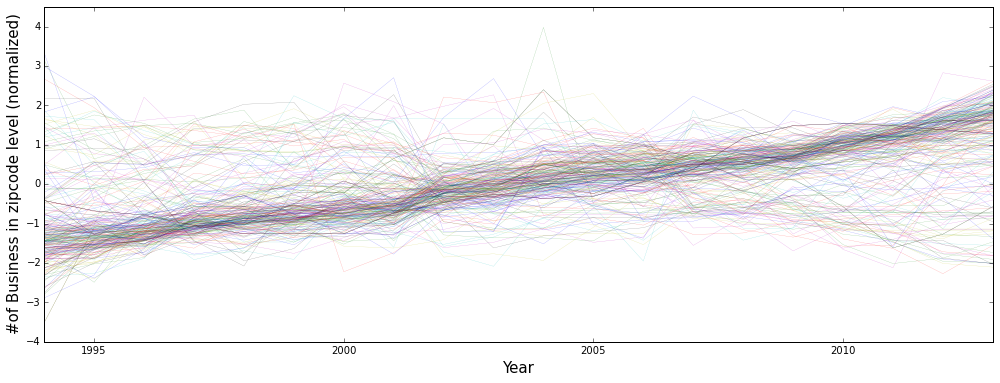

In [19]:
#Plot timeseries (normalized data)

fig = plt.figure(figsize=(17, 6))
plt.ylabel('#of Business in zipcode level (normalized)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim(1994,2013)
plt.ylim(-4,4.5)

for i in range(len(myarray_norm)):
    plt.plot(year_list,myarray_norm[i], alpha=0.5, linewidth=0.2)

#K-means Clustering Analysis
###N=2

In [20]:
Kc2 = KMeans(n_clusters=2, n_init=50)
Kc2.fit(myarray_norm)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=50,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [21]:
group_Kc2=Kc2.predict(myarray_norm)
group_Kc2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
group_Kc2_N = np.zeros([2,243])

for n in range(2):
    for i in range(len(myarray_norm)):
        if group_Kc2[i]==n:
            group_Kc2_N[n][i]=1
        else:
            group_Kc2_N[n][i]=0

print group_Kc2_N

[[ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0.
   1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.
   0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.
   1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   0.  1.  1.  1.  1.  1.  1.  1.  1.]

In [23]:
meancenter2 = np.zeros([2,20])

for n in range(len(group_Kc2_N)):
    
    for i in range(len(myarray_norm[0])): #20
    
        A=[]
        for j in range(len(myarray_norm)): #243
            a=myarray_norm[j][i]*group_Kc2_N[n][j]
            A.append(a)
    
        meancenter2[n][i]=sum(A)/sum(group_Kc2_N[n])

meancenter2

array([[-1.39424875, -1.29054962, -1.16450479, -0.9716069 , -0.86093968,
        -0.75597192, -0.63030614, -0.5613062 , -0.18655403, -0.02385844,
         0.19273729,  0.31367484,  0.36998569,  0.53605127,  0.63673438,
         0.74144723,  0.96997239,  1.13624529,  1.34500224,  1.59799583],
       [ 0.21688149,  0.37584447,  0.39546879,  0.45766117,  0.51166741,
         0.61681419,  0.70468028,  0.58163705,  0.02283505, -0.08175883,
         0.17793197,  0.00604838, -0.08806646, -0.23953001, -0.41318363,
        -0.5252938 , -0.66549634, -0.8336589 , -0.66052396, -0.55995831]])

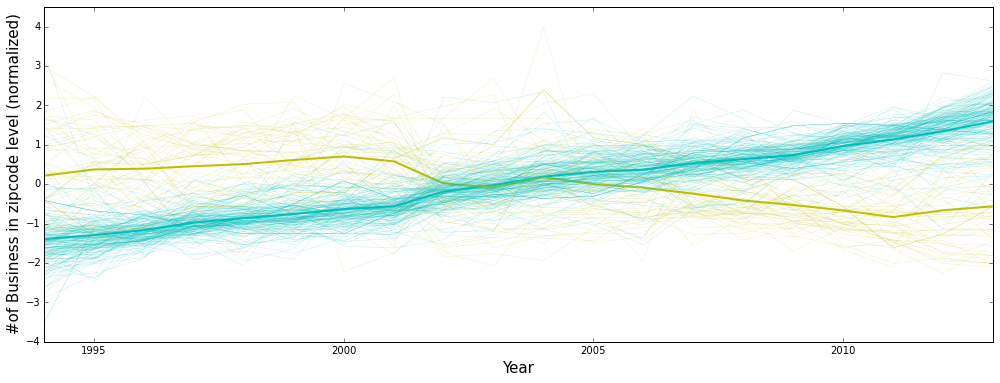

In [24]:
colors=['c','y','m', 'b','g','r','k']

fig = plt.figure(figsize=(17, 6))
plt.ylabel('#of Business in zipcode level (normalized)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim(1994,2013)
plt.ylim(-4,4.5)

for i in range(len(group_Kc2_N)):
    plt.plot(year_list,meancenter2[i], color=colors[i], linewidth=2)

for i in range(len(myarray_norm)):
    for n in range(2):
        if group_Kc2[i]==n:
            plt.plot(year_list,myarray_norm[i], color=colors[n] , alpha=0.5, linewidth=0.2)

###N=3

In [25]:
Kc3 = KMeans(n_clusters=3, n_init=50)
Kc3.fit(myarray_norm)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=50,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [26]:
group_Kc3=Kc3.predict(myarray_norm)
#group_Kc3

In [27]:
group_Kc3_N = np.zeros([3,243])

for n in range(3):
    for i in range(len(myarray_norm)):
        if group_Kc3[i]==n:
            group_Kc3_N[n][i]=1
        else:
            group_Kc3_N[n][i]=0

#print group_Kc3_N

In [28]:
meancenter3 = np.zeros([3,20])

for n in range(len(group_Kc3_N)):
    
    for i in range(len(myarray_norm[0])): #20
    
        A=[]
        for j in range(len(myarray_norm)): #243
            a=myarray_norm[j][i]*group_Kc3_N[n][j]
            A.append(a)
    
        meancenter3[n][i]=sum(A)/sum(group_Kc3_N[n])
#meancenter3

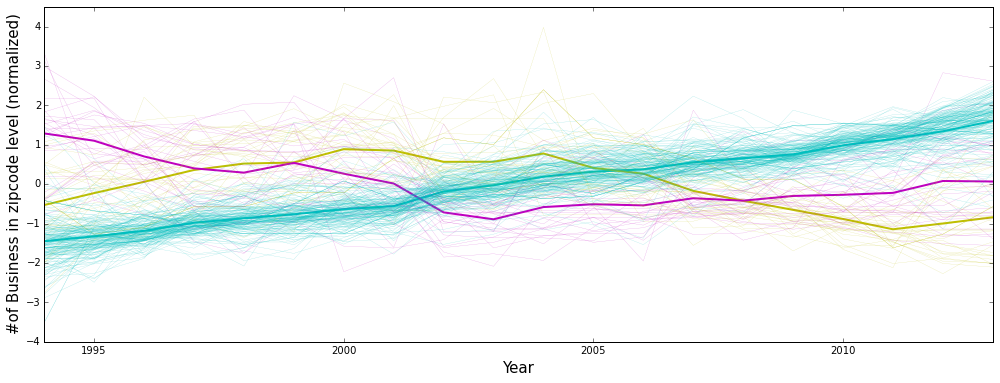

In [29]:
fig = plt.figure(figsize=(17, 6))
plt.ylabel('#of Business in zipcode level (normalized)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim(1994,2013)
plt.ylim(-4,4.5)

for i in range(len(group_Kc3_N)):
    plt.plot(year_list,meancenter3[i], color=colors[i], linewidth=2)

for i in range(len(myarray_norm)):
    for n in range(3):
        if group_Kc3[i]==n:
            plt.plot(year_list,myarray_norm[i], color=colors[n] , alpha=0.5, linewidth=0.2)

###N=4

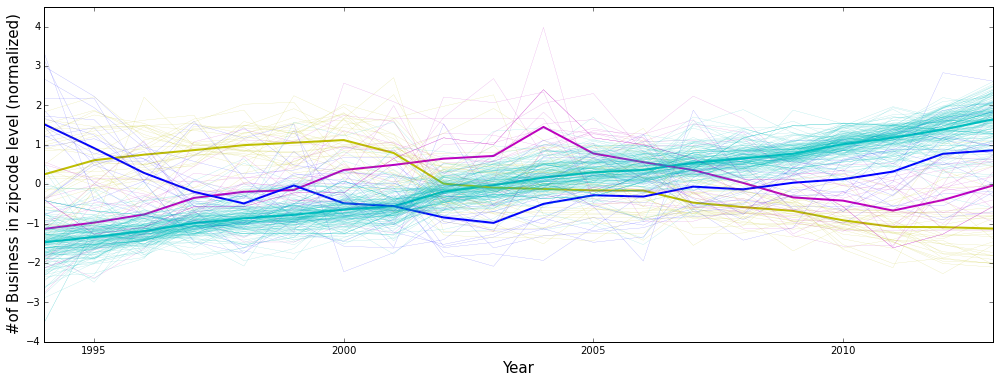

In [30]:
Kc4 = KMeans(n_clusters=4, n_init=50)
Kc4.fit(myarray_norm)

group_Kc4=Kc4.predict(myarray_norm)

group_Kc4_N = np.zeros([4,243])
for n in range(4):
    for i in range(len(myarray_norm)):
        if group_Kc4[i]==n:
            group_Kc4_N[n][i]=1
        else:
            group_Kc4_N[n][i]=0

meancenter4 = np.zeros([4,20])

for n in range(len(group_Kc4_N)):
    
    for i in range(len(myarray_norm[0])): #20
    
        A=[]
        for j in range(len(myarray_norm)): #243
            a=myarray_norm[j][i]*group_Kc4_N[n][j]
            A.append(a)
    
        meancenter4[n][i]=sum(A)/sum(group_Kc4_N[n])

fig = plt.figure(figsize=(17, 6))
plt.ylabel('#of Business in zipcode level (normalized)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim(1994,2013)
plt.ylim(-4,4.5)

for i in range(len(group_Kc4_N)):
    plt.plot(year_list,meancenter4[i], color=colors[i], linewidth=2)

for i in range(len(myarray_norm)):
    for n in range(4):
        if group_Kc4[i]==n:
            plt.plot(year_list,myarray_norm[i], color=colors[n] , alpha=0.5, linewidth=0.2)

###N=5

In [31]:
Kc5 = KMeans(n_clusters=5, n_init=50)
Kc5.fit(myarray_norm)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=50,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [32]:
group_Kc5=Kc5.predict(myarray_norm)
#group_Kc5

In [33]:
group_Kc5_N = np.zeros([5,243])

for n in range(5):
    for i in range(len(myarray_norm)):
        if group_Kc5[i]==n:
            group_Kc5_N[n][i]=1
        else:
            group_Kc5_N[n][i]=0

#print group_Kc5_N

In [34]:
meancenter5 = np.zeros([5,20])

for n in range(len(group_Kc5_N)):
    
    for i in range(len(myarray_norm[0])): #20
    
        A=[]
        for j in range(len(myarray_norm)): #243
            a=myarray_norm[j][i]*group_Kc5_N[n][j]
            A.append(a)
    
        meancenter5[n][i]=sum(A)/sum(group_Kc5_N[n])
        
#meancenter5

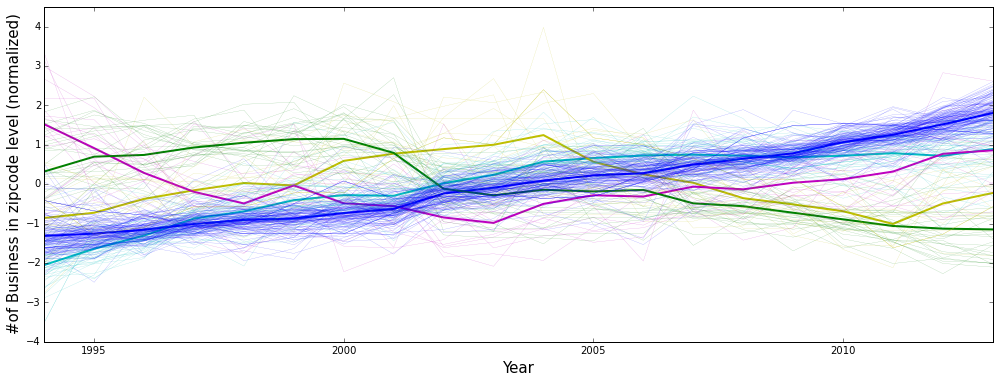

In [35]:
fig = plt.figure(figsize=(17, 6))
plt.ylabel('#of Business in zipcode level (normalized)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim(1994,2013)
plt.ylim(-4,4.5)

for i in range(len(group_Kc5_N)):
    plt.plot(year_list,meancenter5[i], color=colors[i], linewidth=2)

for i in range(len(myarray_norm)):
    for n in range(5):
        if group_Kc5[i]==n:
            plt.plot(year_list,myarray_norm[i], color=colors[n] , alpha=0.5, linewidth=0.2)

#Agglomerative Clustering
###N=2

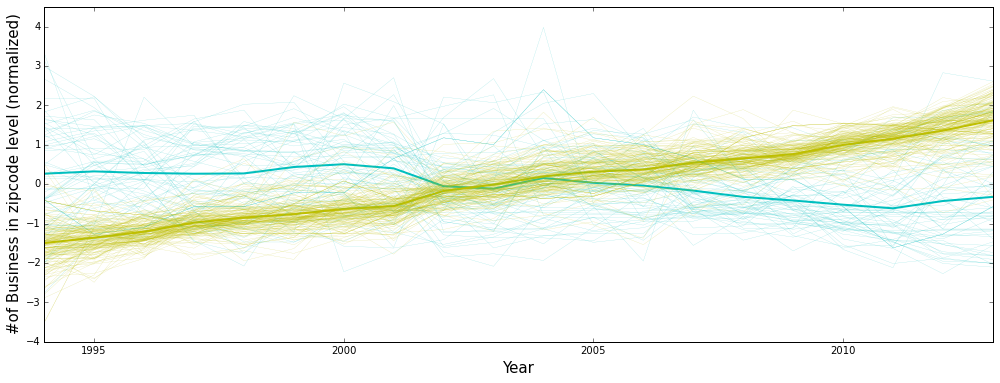

In [36]:
Ac2 = AgglomerativeClustering(n_clusters=2)
Ac2.fit(myarray_norm)

group_Ac2=Ac2.fit_predict(myarray_norm)

group_Ac2_N = np.zeros([2,243])
for n in range(2):
    for i in range(len(myarray_norm)):
        if group_Ac2[i]==n:
            group_Ac2_N[n][i]=1
        else:
            group_Ac2_N[n][i]=0

meancenterA2 = np.zeros([2,20])

for n in range(len(group_Ac2_N)):
    
    for i in range(len(myarray_norm[0])): #20
    
        A=[]
        for j in range(len(myarray_norm)): #243
            a=myarray_norm[j][i]*group_Ac2_N[n][j]
            A.append(a)
    
        meancenterA2[n][i]=sum(A)/sum(group_Ac2_N[n])

fig = plt.figure(figsize=(17, 6))
plt.ylabel('#of Business in zipcode level (normalized)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim(1994,2013)
plt.ylim(-4,4.5)

for i in range(len(group_Ac2_N)):
    plt.plot(year_list,meancenterA2[i], color=colors[i], linewidth=2)

for i in range(len(myarray_norm)):
    for n in range(2):
        if group_Ac2[i]==n:
            plt.plot(year_list,myarray_norm[i], color=colors[n] , alpha=0.5, linewidth=0.2)

###N=3

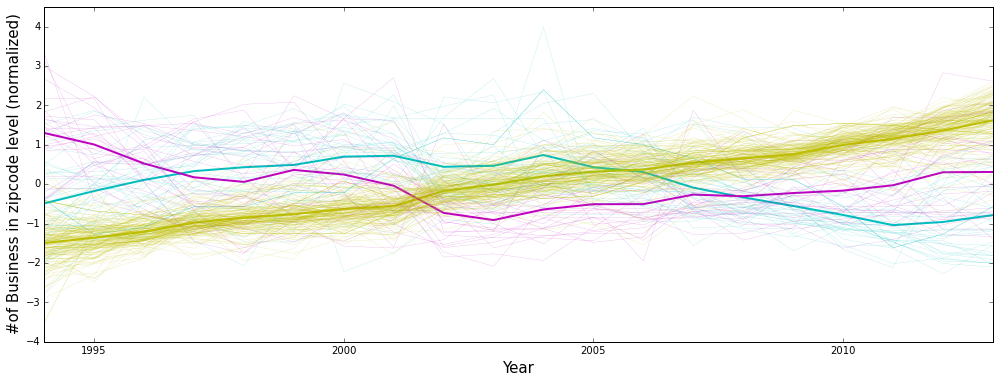

In [37]:
Ac3 = AgglomerativeClustering(n_clusters=3)
Ac3.fit(myarray_norm)

group_Ac3=Ac3.fit_predict(myarray_norm)

group_Ac3_N = np.zeros([3,243])
for n in range(3):
    for i in range(len(myarray_norm)):
        if group_Ac3[i]==n:
            group_Ac3_N[n][i]=1
        else:
            group_Ac3_N[n][i]=0

meancenterA3 = np.zeros([3,20])

for n in range(len(group_Ac3_N)):
    
    for i in range(len(myarray_norm[0])): #20
    
        A=[]
        for j in range(len(myarray_norm)): #243
            a=myarray_norm[j][i]*group_Ac3_N[n][j]
            A.append(a)
    
        meancenterA3[n][i]=sum(A)/sum(group_Ac3_N[n])

fig = plt.figure(figsize=(17, 6))
plt.ylabel('#of Business in zipcode level (normalized)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim(1994,2013)
plt.ylim(-4,4.5)

for i in range(len(group_Ac3_N)):
    plt.plot(year_list,meancenterA3[i], color=colors[i], linewidth=2)

for i in range(len(myarray_norm)):
    for n in range(3):
        if group_Ac3[i]==n:
            plt.plot(year_list,myarray_norm[i], color=colors[n] , alpha=0.5, linewidth=0.2)

###N=4

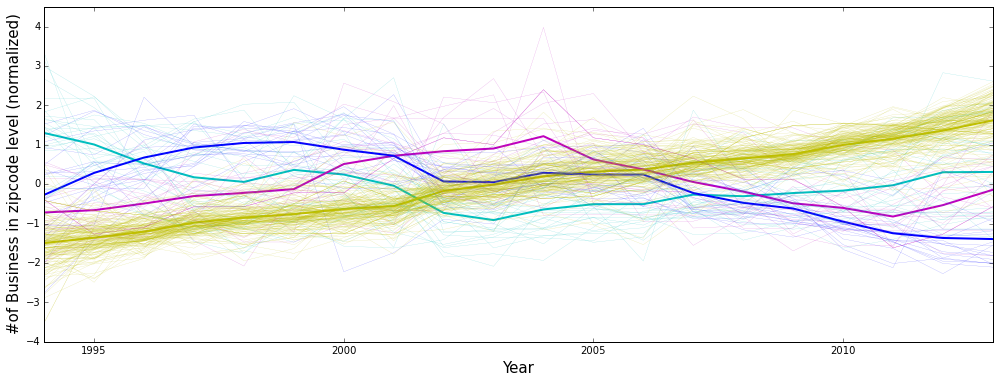

In [38]:
Ac4 = AgglomerativeClustering(n_clusters=4)
Ac4.fit(myarray_norm)

group_Ac4=Ac4.fit_predict(myarray_norm)

group_Ac4_N = np.zeros([4,243])
for n in range(4):
    for i in range(len(myarray_norm)):
        if group_Ac4[i]==n:
            group_Ac4_N[n][i]=1
        else:
            group_Ac4_N[n][i]=0

meancenterA4 = np.zeros([4,20])

for n in range(len(group_Ac4_N)):
    
    for i in range(len(myarray_norm[0])): #20
    
        A=[]
        for j in range(len(myarray_norm)): #243
            a=myarray_norm[j][i]*group_Ac4_N[n][j]
            A.append(a)
    
        meancenterA4[n][i]=sum(A)/sum(group_Ac4_N[n])

fig = plt.figure(figsize=(17, 6))
plt.ylabel('#of Business in zipcode level (normalized)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim(1994,2013)
plt.ylim(-4,4.5)

for i in range(len(group_Ac4_N)):
    plt.plot(year_list,meancenterA4[i], color=colors[i], linewidth=2)

for i in range(len(myarray_norm)):
    for n in range(4):
        if group_Ac4[i]==n:
            plt.plot(year_list,myarray_norm[i], color=colors[n] , alpha=0.5, linewidth=0.2)

###N=5

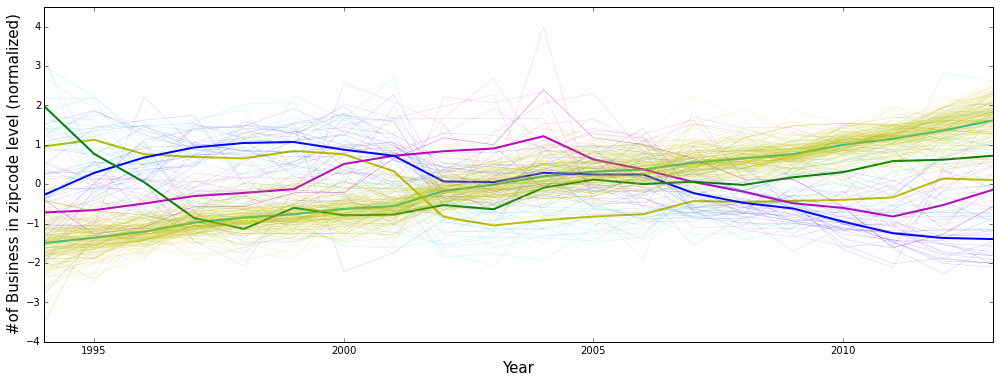

In [39]:
Ac5 = AgglomerativeClustering(n_clusters=5)
Ac5.fit(myarray_norm)

group_Ac5=Ac5.fit_predict(myarray_norm)

group_Ac5_N = np.zeros([5,243])
for n in range(5):
    for i in range(len(myarray_norm)):
        if group_Ac5[i]==n:
            group_Ac5_N[n][i]=1
        else:
            group_Ac5_N[n][i]=0

meancenterA5 = np.zeros([5,20])

for n in range(len(group_Ac5_N)):
    
    for i in range(len(myarray_norm[0])): #20
    
        A=[]
        for j in range(len(myarray_norm)): #243
            a=myarray_norm[j][i]*group_Ac5_N[n][j]
            A.append(a)
    
        meancenterA5[n][i]=sum(A)/sum(group_Ac5_N[n])

fig = plt.figure(figsize=(17, 6))
plt.ylabel('#of Business in zipcode level (normalized)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim(1994,2013)
plt.ylim(-4,4.5)

for i in range(len(group_Ac5_N)):
    plt.plot(year_list,meancenterA5[i], color=colors[i], linewidth=2)

for i in range(len(myarray_norm)):
    for n in range(5):
        if group_Ac4[i]==n:
            plt.plot(year_list,myarray_norm[i], color=colors[n] , alpha=0.5, linewidth=0.2)

#Mapping NYC

In [40]:
mydata['Kc2']=group_Kc2
mydata['Kc3']=group_Kc3
mydata['Kc4']=group_Kc4
mydata['Kc5']=group_Kc5
mydata['Ac2']=group_Ac2
mydata['Ac3']=group_Ac3
mydata['Ac4']=group_Ac4
mydata['Ac5']=group_Ac5
mydata['postalCode']=mydata.index.astype(float)
mydata.head()

1994  1995  1996  1997  1998  1999  2000  2001  2002  2003     ...      \
zip                                                                   ...       
10001  6999  7088  7075  7154  7254  7233  7317  7188  7141  7084     ...       
10002  1784  1819  1919  2049  2003  2085  2277  2543  2269  2402     ...       
10003  3256  3377  3417  3535  3649  3659  3683  3602  3616  3704     ...       
10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  1252     ...       
10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  1252     ...       

       2013  Kc2  Kc3  Kc4  Kc5  Ac2  Ac3  Ac4  Ac5  postalCode  
zip                                                              
10001  7273    0    0    2    0    1    1    1    0       10001  
10002  2988    0    0    0    3    1    1    1    0       10002  
10003  4277    0    0    0    3    1    1    1    0       10003  
10004  1479    0    0    0    3    1    1    1    0       10004  
10004  1479    0    0    0    3    1    1    1    0       10004  

[5 rows x 29 columns]

In [41]:
NYC=gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
NYC['postalCode']=NYC['postalCode'].astype(float)

In [42]:
NYC=pd.merge(NYC, mydata, on=['postalCode'], how='inner')
NYC.head()

@id  BLDGpostalCode CTY_FIPS  \
0  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
1  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
2  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
3  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
4  http://nyc.pediacities.com/Resource/PostalCode...               0      081   

   OBJECTID          PO_NAME STATE ST_FIPS      Shape_Area    Shape_Leng  \
0         1  Jackson Heights    NY      36  20163283.87440  20624.692317   
1         2        Glen Oaks    NY      36  22606526.91390  23002.816039   
2         3    New Hyde Park    NY      36   6269333.41234  15749.161511   
3         4        Bellerose    NY      36  49418364.05770  35932.810639   
4         5    Fresh Meadows    NY      36  69385865.59430  38693.565676   

  borough ...   2012  2013  Kc2  Kc3  Kc4  Kc5  Ac2  Ac3  Ac4  Ac5  
0  Queens ...   1724  1759    0    0    0    3    1    1    1    0  
1  Queens ...    241   241    0    0    0    3    1    1    1    0  
2  Queens ...   1510  1539    0    0    0    3    1    1    1    0  
3  Queens ...    266   258    0    2    3    2    0    2    0    4  
4  Queens ...    679   714    0    0    0    3    1    1    1    0  

[5 rows x 40 columns]

(-74.299999999999997,
 -73.599999999999994,
 40.400000000000006,
 41.000000000000007)

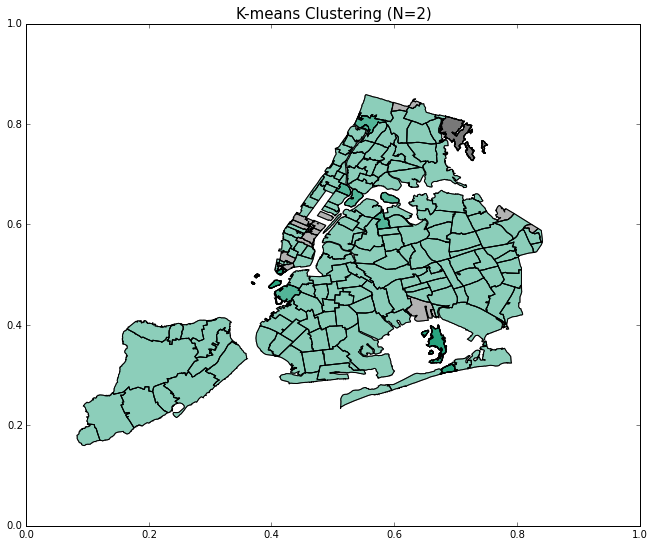

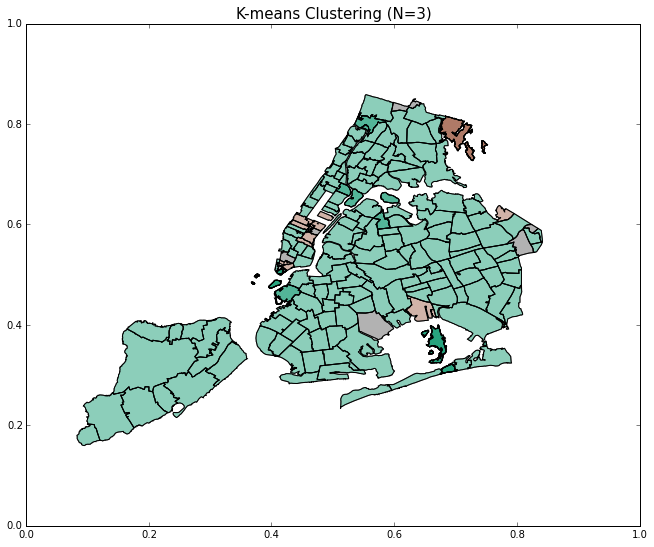

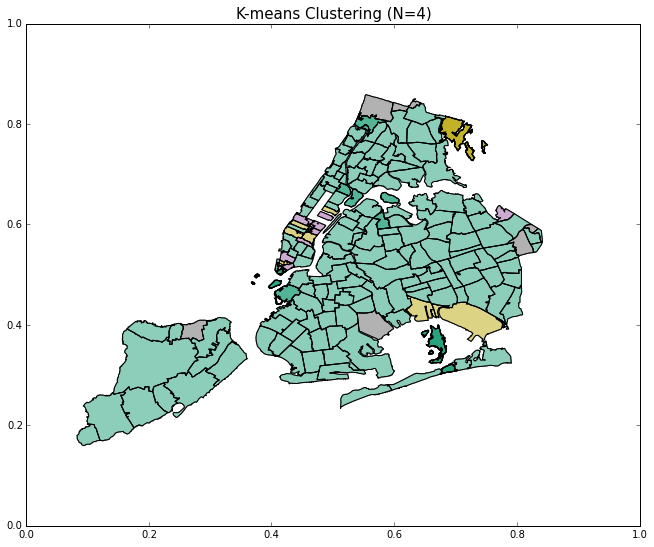

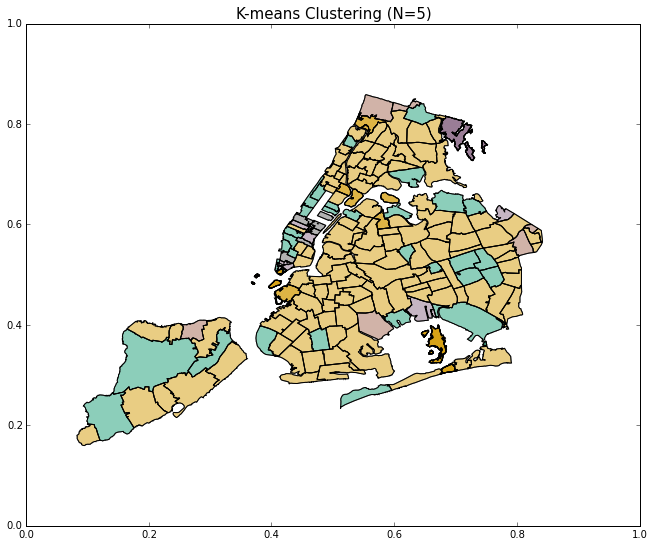

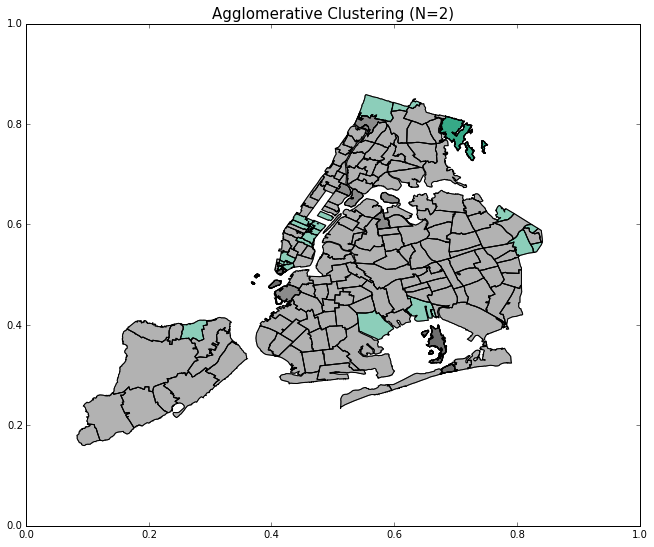

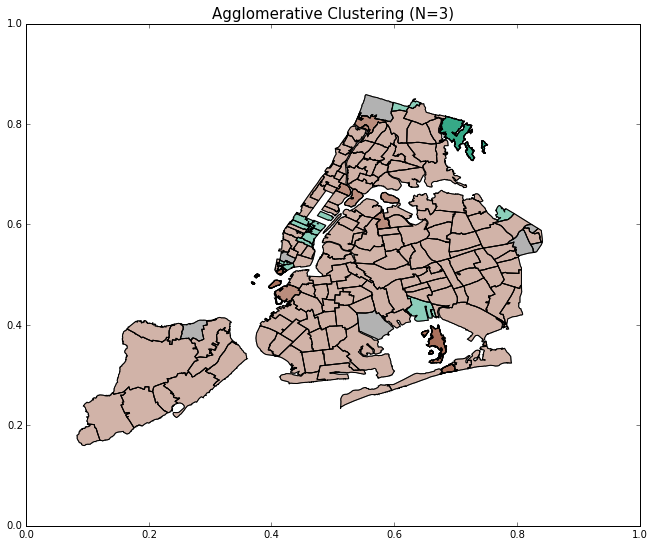

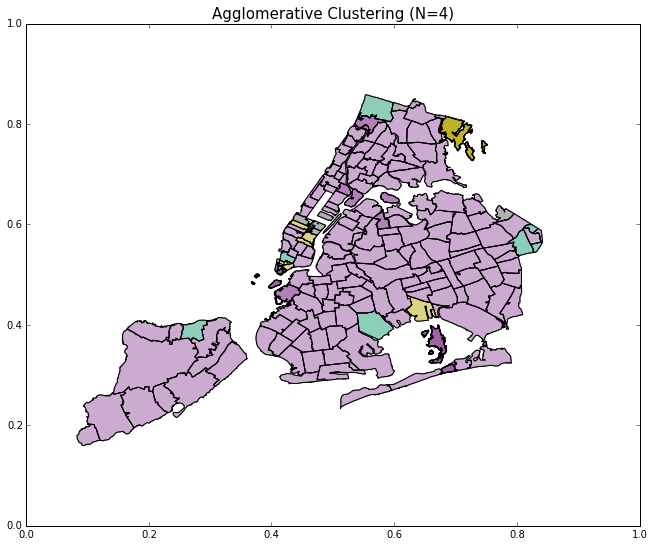

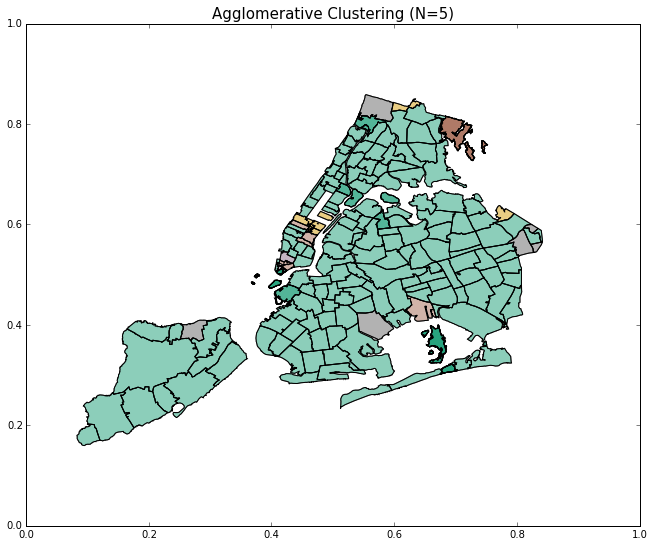

In [50]:
#Mapping K-means Clustering
pl.figure(figsize=(11, 9))
pl.title("K-means Clustering (N=2)", fontsize=15)
pl.legend()
NYC.plot(column='Kc2', colormap='Dark2' )
plt.axis('off')

pl.figure(figsize=(11, 9))
pl.title("K-means Clustering (N=3)", fontsize=15)
NYC.plot(column='Kc3', colormap='Dark2')
plt.axis('off')

pl.figure(figsize=(11, 9))
pl.title("K-means Clustering (N=4)", fontsize=15)
NYC.plot(column='Kc4', colormap='Dark2')
plt.axis('off')

pl.figure(figsize=(11, 9))
pl.title("K-means Clustering (N=5)", fontsize=15)
NYC.plot(column='Kc5', colormap='Dark2')
plt.axis('off')

#Mapping Agglomerative Clustering
pl.figure(figsize=(11, 9))
pl.title("Agglomerative Clustering (N=2)", fontsize=15)
NYC.plot(column='Ac2', colormap='Dark2')
plt.axis('off')

pl.figure(figsize=(11, 9))
pl.title("Agglomerative Clustering (N=3)", fontsize=15)
NYC.plot(column='Ac3', colormap='Dark2')
plt.axis('off')

pl.figure(figsize=(11, 9))
pl.title("Agglomerative Clustering (N=4)", fontsize=15)
NYC.plot(column='Ac4', colormap='Dark2')
plt.axis('off')

pl.figure(figsize=(11, 9))
pl.title("Agglomerative Clustering (N=5)", fontsize=15)
NYC.plot(column='Ac5', colormap='Dark2')
plt.axis('off')

#Interpretation
* It is difficult to make cleare interpretation based on these clustering result. Nevertheless, I tryed to find something clear pattern of change in business establishment in NYC. 
* Above all, K-means clustering and Agglomerative clustering shows similar results. 
* The most harsh thing is to decide 'N' (the number of cluster). I think N=3 is appropriate in this analysis. Because there is not big difference in visual (mapping) result between N=3 and other bigger numbers. 
* I conclude that New York City has three different pattern of the number of business; 1)steadily increase, 2)increase first and decrease recntly (inverse U shape), and lastly 3)decrease first and increase recently (U shape). 